# 준비

In [1]:
!pip uninstall tensorflow -y
!pip install tensorflow==1.14
!pip uninstall keras -y
!pip install keras==2.2.5
!pip install h5py==2.10.0

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
ERROR: Could not find a version that satisfies the requirement tensorflow==1.14 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1)
ERROR: No matching distribution found for tensorflow==1.14
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.2/336.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 

In [ ]:
import tarfile
import os
import random
import datetime
import pickle
import fnmatch

import numpy as np
np.set_printoptions(formatter={'float_kind' : lambda x : "%.4f" % x})

import pandas as pd
pd.set_option('display.width', 300)
pd.set_option('display.float_format', '{ :, .4f}'.format)
pd.set_option('display.max_colwidth', 200)

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

print(f'tf.__version__: {tf.__version__}')
print(f'.keras.__version__: {tensorflow.keras.__version__}')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import cv2
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

tf.__version__: 1.14.0
.keras.__version__: 2.2.4-tf


# 압축풀기

In [ ]:
fname = './data.tar'
ap = tarfile.open(fname)
ap.extractall('./data')
ap.close()

In [ ]:
data_dir = './data'
file_list = os.listdir(data_dir)
image_paths = []
states = []
pattern = "*.png"

for filename in file_list:
  if fnmatch.fnmatch(filename, pattern):
    image_paths.append(os.path.join(data_dir,filename))
    state = str(filename[-5:-4])
    states.append(state)

img_path : ./data/_02734_L.png
state : L


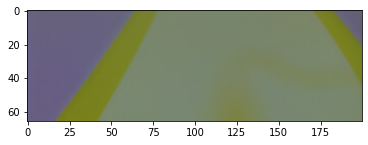

In [ ]:
image_index = 30
plt.imshow(Image.open(image_paths[image_index]))
print("img_path : %s" % image_paths[image_index])
print("state : %s" % states[image_index])

# 이미지 데이터로 저장

In [ ]:
images = [cv2.imread(img) for img in image_paths]

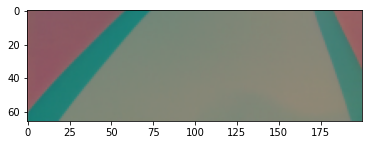

In [ ]:
plt.imshow(images[35])

In [ ]:
images[0].shape

(66, 200, 3)

In [ ]:
type(states[0])

str

# 데이터 확인

In [ ]:
df = pd.DataFrame()
df['state'] = states
df['state'].value_counts()

G    2645
L     177
R     133
Name: state, dtype: int64

In [ ]:
L_data =[]
R_data = []
G_data = []

In [ ]:
for i in range(len(states)):
  if states[i] == "L":
    L_data.append(images[i])
  elif states[i] == "R":
    R_data.append(images[i])
  elif states[i] == "G":
    G_data.append(images[i])

In [ ]:
images = []
states = []


In [ ]:
for i in range(len(L_data)):
  images.append(L_data[i])
  states.append("L")
for i in range(len(R_data)):
  images.append(R_data[i])
  states.append("R")
for i in range(len(G_data[:177])):
  images.append(G_data[i])
  states.append("G")

In [ ]:
images = np.asarray(images)
states = np.asarray(states)

In [ ]:
len(images)

1461

R


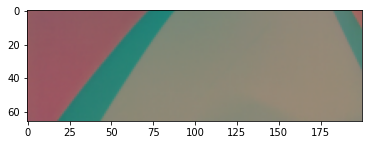

In [ ]:
plt.imshow(images[177])
print(states[177])

In [ ]:
for _ in range(2):
  for i in range(len(L_data)):
    images.append(L_data[i])
    states.append("L")


AttributeError: ignored

In [ ]:
for _ in range(2):
  for i in range(len(R_data)):
    images.append(R_data[i])
    states.append("R")

In [ ]:
df = pd.DataFrame()
df['state'] = states
df['state'].value_counts()

# 데이터 분리

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, states, test_size = 0.2)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

1168 293
1168 293


In [ ]:
print(type(y_train))

<class 'numpy.ndarray'>


# 데이터 정규화

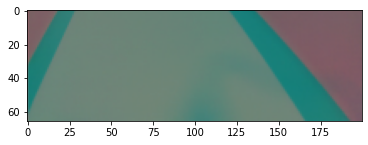

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

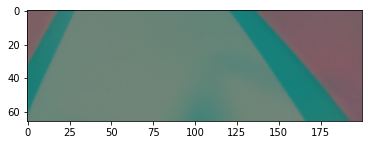

In [ ]:
plt.imshow(x_train[0])

In [ ]:
print(y_test[:30])

['L' 'L' 'G' 'L' 'G' 'G' 'L' 'G' 'L' 'R' 'G' 'G' 'G' 'L' 'L' 'G' 'G' 'G'
 'G' 'R' 'G' 'L' 'G' 'L' 'G' 'R' 'L' 'G' 'G' 'R']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [ ]:
# G =0, L = 1, R= 2
print(y_test[:30])

[1 1 0 1 0 0 1 0 1 2 0 0 0 1 1 0 0 0 0 2 0 1 0 1 0 2 1 0 0 2]


In [ ]:
x_train.shape

(1168, 66, 200, 3)

# CNN 모델구성


In [ ]:
model = Sequential()

model.add(Conv2D(24, (5, 5), activation='relu', input_shape=(66, 200, 3)))
model.add(Conv2D(48, (5, 5), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

#모델 컴파일
model.compile(loss= "sparse_categorical_crossentropy", optimizer=Adam(lr=1e-3), metrics=['acc'])

#모델 구조출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 196, 24)       1824      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 192, 48)       28848     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 190, 64)       27712     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 54, 188, 64)       36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 649728)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               64972900  
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

In [ ]:
model.fit(x_train, y_train, epochs = 15, batch_size=128)

Epoch 1/15
1168/1168 [==============================] - 217s 186ms/sample - loss: 4.2365 - acc: 0.3467
Epoch 2/15
1168/1168 [==============================] - 218s 187ms/sample - loss: 1.1064 - acc: 0.3682
Epoch 3/15
1168/1168 [==============================] - 217s 186ms/sample - loss: 1.1064 - acc: 0.3536
Epoch 4/15
1168/1168 [==============================] - 217s 186ms/sample - loss: 1.0982 - acc: 0.3724
Epoch 5/15
1168/1168 [==============================] - 217s 186ms/sample - loss: 1.0978 - acc: 0.3724
Epoch 6/15
1168/1168 [==============================] - 217s 186ms/sample - loss: 1.0968 - acc: 0.3724
Epoch 7/15
1168/1168 [==============================] - 217s 186ms/sample - loss: 1.0959 - acc: 0.3724
Epoch 8/15
1168/1168 [==============================] - 217s 186ms/sample - loss: 1.0950 - acc: 0.3724
Epoch 9/15
1168/1168 [==============================] - 217s 186ms/sample - loss: 1.0951 - acc: 0.3724
Epoch 10/15
1168/1168 [==============================] - 219s 187ms/sampl

In [ ]:
model.evaluate(x_test, y_test)

98/98 [==============================] - 4s 45ms/sample - loss: 0.5436 - acc: 0.7857


[0.5436212554269907, 0.78571427]

In [ ]:
model.save("./deep_auto.h5")